In [1]:
%matplotlib inline


# Ordinary Least Squares and Ridge Regression Variance
Due to the few points in each dimension and the straight
line that linear regression uses to follow these points
as well as it can, noise on the observations will cause
great variance as shown in the first plot. Every line's slope
can vary quite a bit for each prediction due to the noise
induced in the observations.

Ridge regression is basically minimizing a penalised version
of the least-squared function. The penalising `shrinks` the
value of the regression coefficients.
Despite the few data points in each dimension, the slope
of the prediction is much more stable and the variance
in the line itself is greatly reduced, in comparison to that
of the standard linear regression


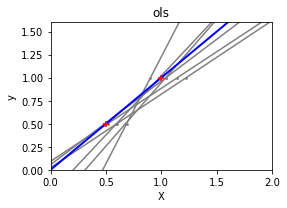

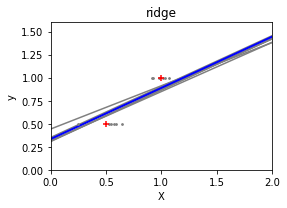

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()